# Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor, StackingRegressor, GradientBoostingClassifier
import xgboost as xgb

/tmp/ipykernel_1583/4019246236.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


read two data train and test

In [2]:
train_df = pd.read_csv('/workspaces/House-Prices---Advanced-Regression-Techniques/data/train.csv')
test_df = pd.read_csv('/workspaces/House-Prices---Advanced-Regression-Techniques/data/test.csv')

# Exploration of data

train_df exploration

In [3]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


test_df columns

In [6]:
test_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Remove outliers

In [7]:
missing_data = train_df.isnull().sum() / len(train_df) * 100
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [8]:
data = []
for col in train_df.columns:
    data.append([col, train_df[col].dtype,
                 train_df[col].nunique(),
                 train_df[col].isnull().sum(),
                 train_df[col].isnull().sum() / len(train_df) * 100])
    
data = pd.DataFrame(data, columns=['Column', 'dtype', 'Nunique', 'Missing_Values', 'Percentage'])
data = data.sort_values(by='Percentage', ascending=False)
data = data[data.Percentage > 0]
data

,Column,dtype,Nunique,Missing_Values,Percentage
72,PoolQC,object,3,1453,99.520548
74,MiscFeature,object,4,1406,96.301370
6,Alley,object,2,1369,93.767123
73,Fence,object,4,1179,80.753425
25,MasVnrType,object,3,872,59.726027
57,FireplaceQu,object,5,690,47.260274
3,LotFrontage,float64,110,259,17.739726
59,GarageYrBlt,float64,97,81,5.547945
64,GarageCond,object,5,81,5.547945
58,GarageType,object,6,81,5.547945


In [9]:
data = train_df.isna().sum().reset_index().rename(columns={0: 'Missing_Values', 'index': 'Column'})
column_missing = list(data[data['Missing_Values'] > 0]['Column'])

In [10]:
# imputing the missing values
for col in column_missing:
    if col == 'Electrical':
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    elif train_df[col].dtype == 'object':
        train_df[col] = train_df[col].fillna('None')
    else:
        train_df[col] = train_df[col].fillna(0)

In [11]:
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [12]:
train_df.shape

(1460, 81)

In [13]:
test_df.shape

(1459, 80)

# Data Visualization

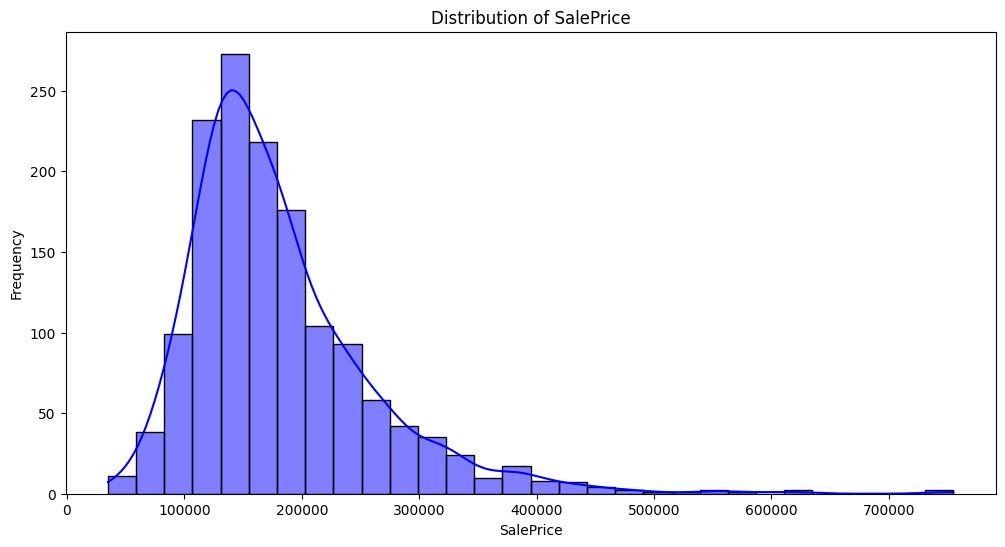

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['SalePrice'], bins=30, kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [15]:
numeric_train = train_df.select_dtypes(include=['int64', 'float64'])
numeric_train.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


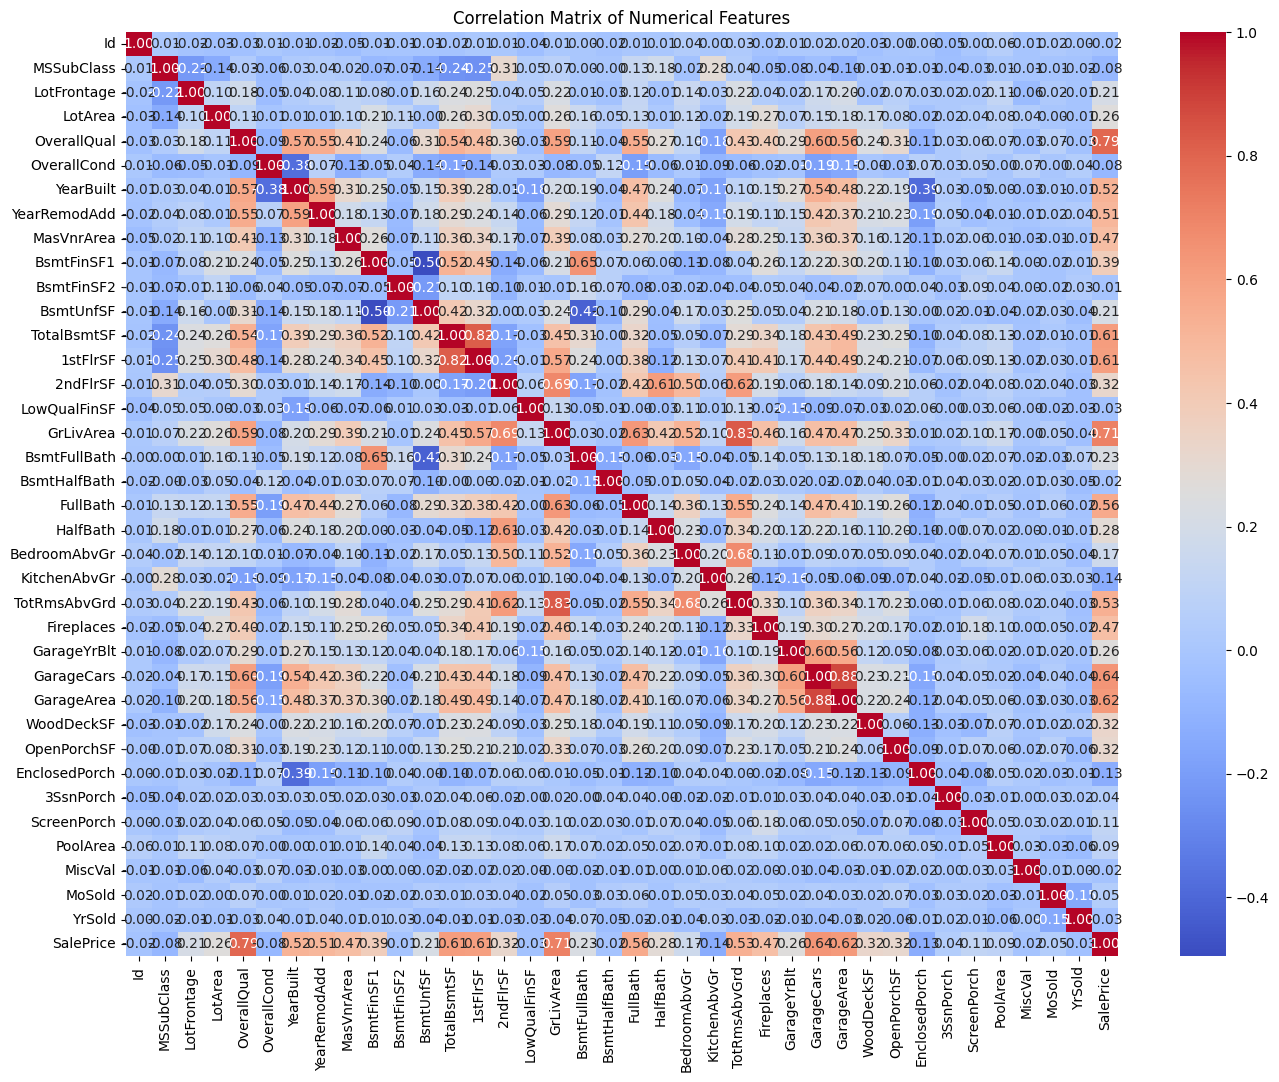

In [16]:
# Visualize the correlation matrix of numerical features
plt.figure(figsize=(16, 12))
correlation_matrix = numeric_train.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

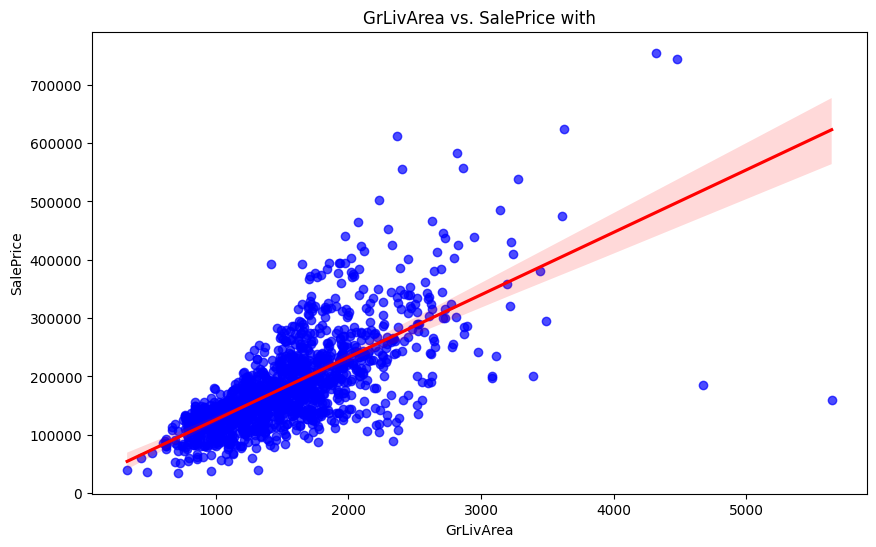

In [17]:
# Visualize the scatter plot for 'GrLivArea' vs. 'SalePrice' with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=train_df, scatter_kws={'alpha': 0.7, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title('GrLivArea vs. SalePrice with')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

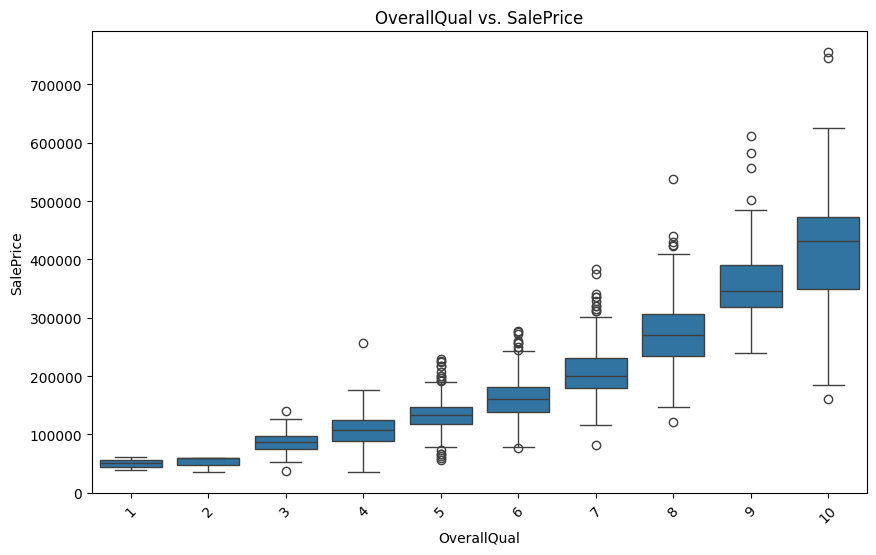

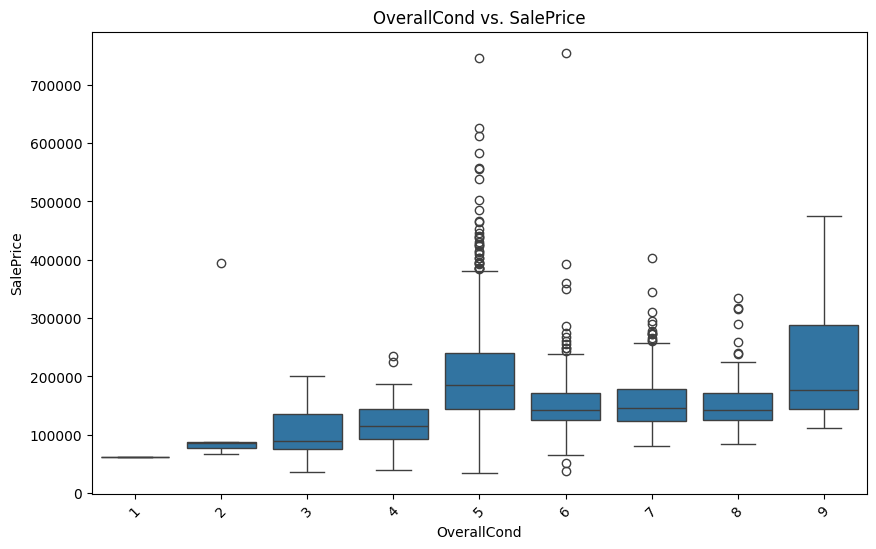

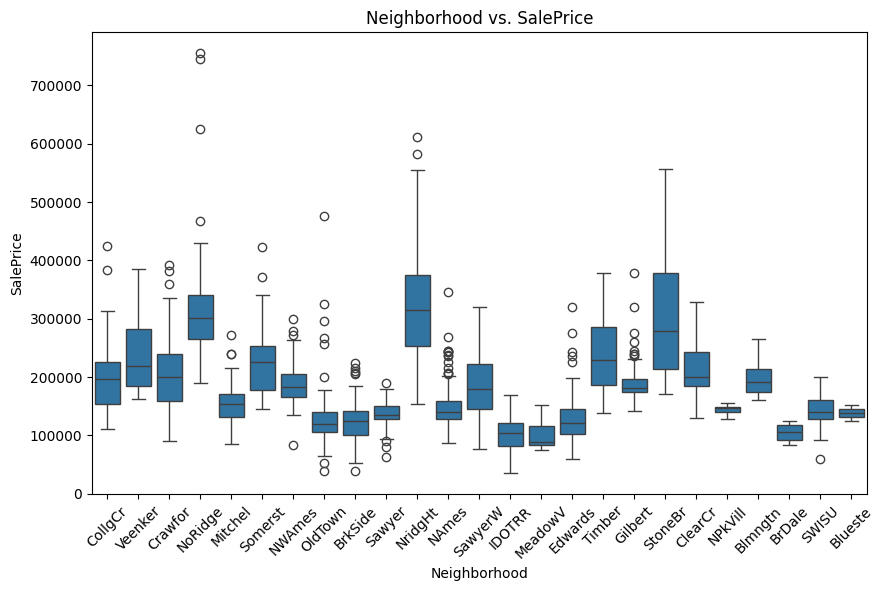

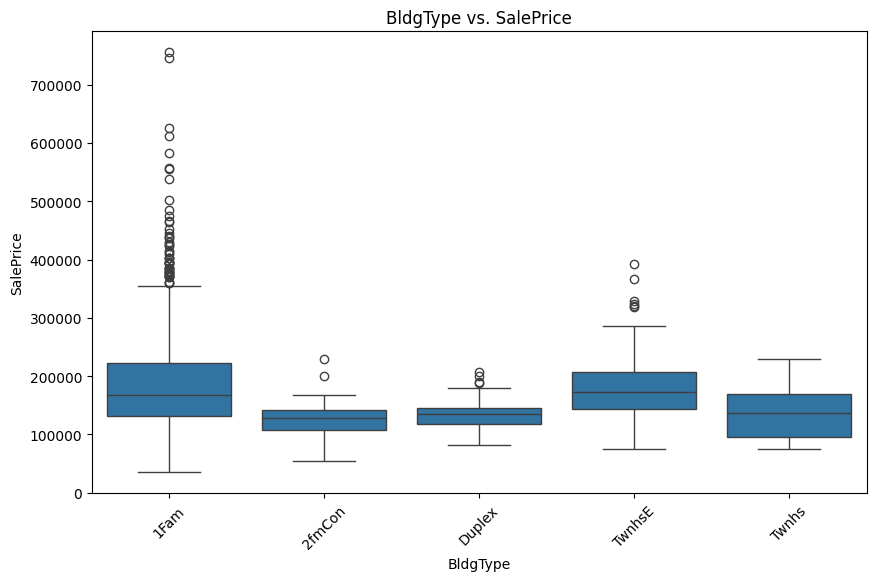

In [18]:
categorical_features = ['OverallQual', 'OverallCond', 'Neighborhood', 'BldgType']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='SalePrice', data=train_df)
    plt.title(f'{feature} vs. SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()

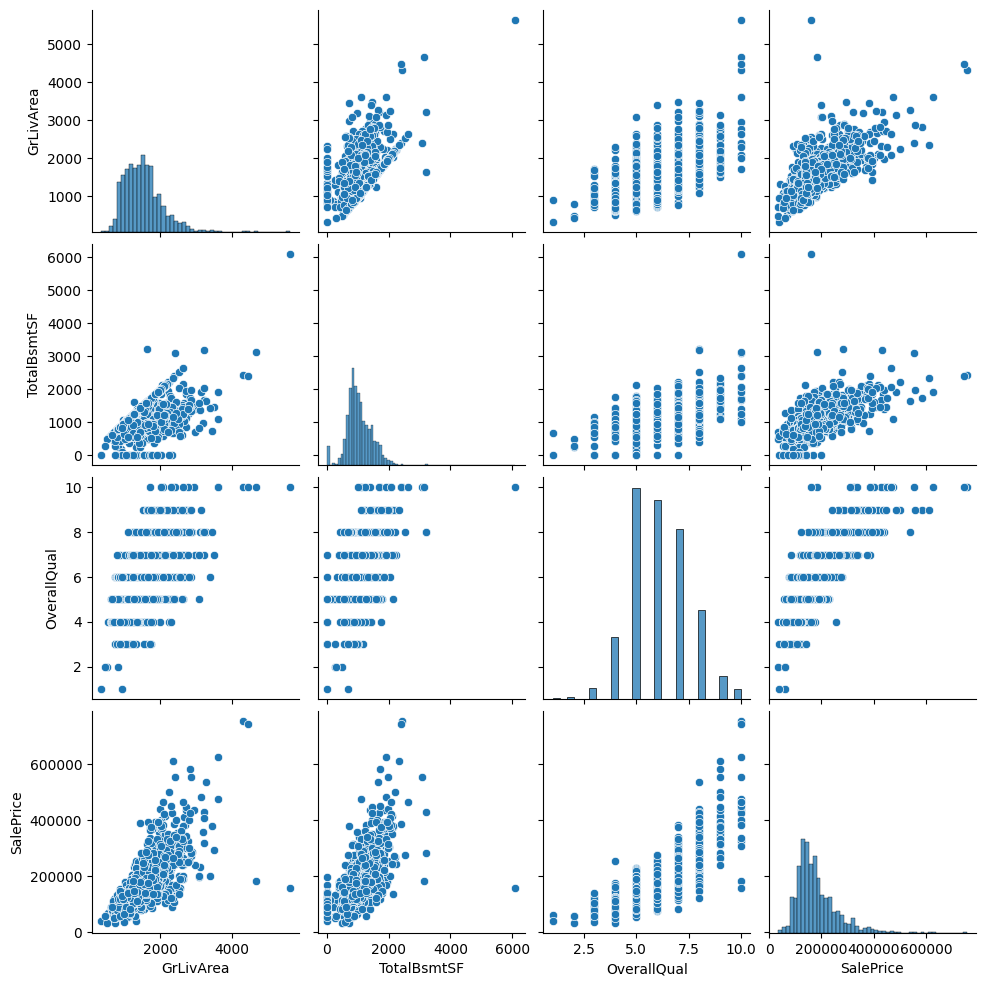

In [19]:
sns.pairplot(train_df[['GrLivArea', 'TotalBsmtSF', 'OverallQual', 'SalePrice']])
plt.show()

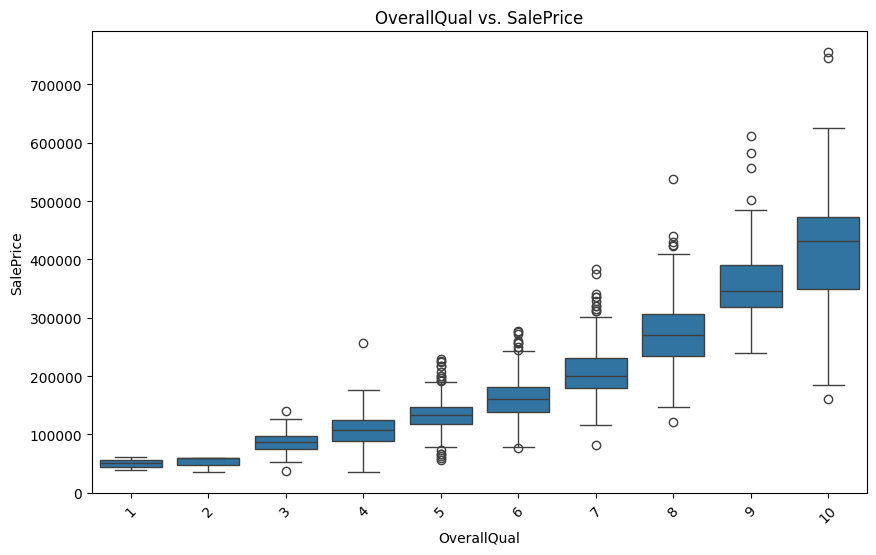

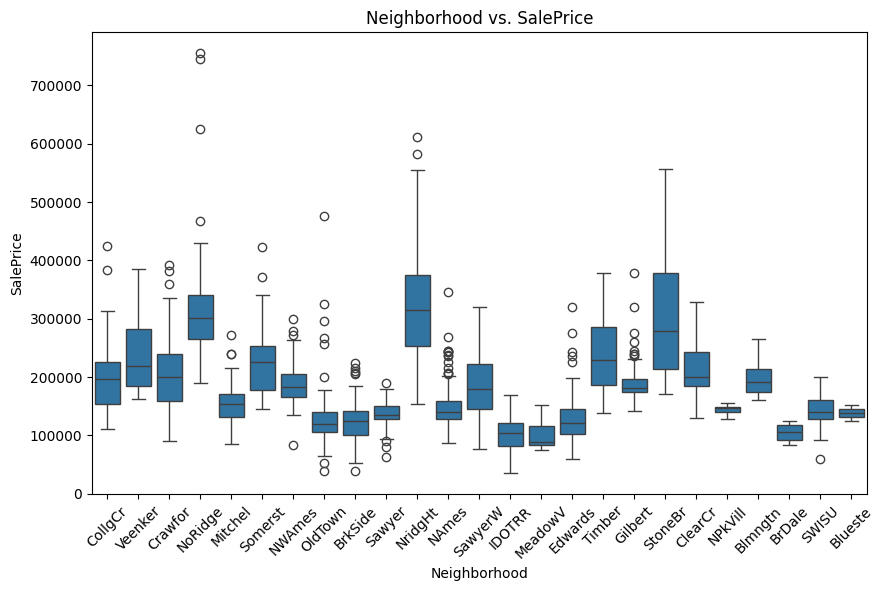

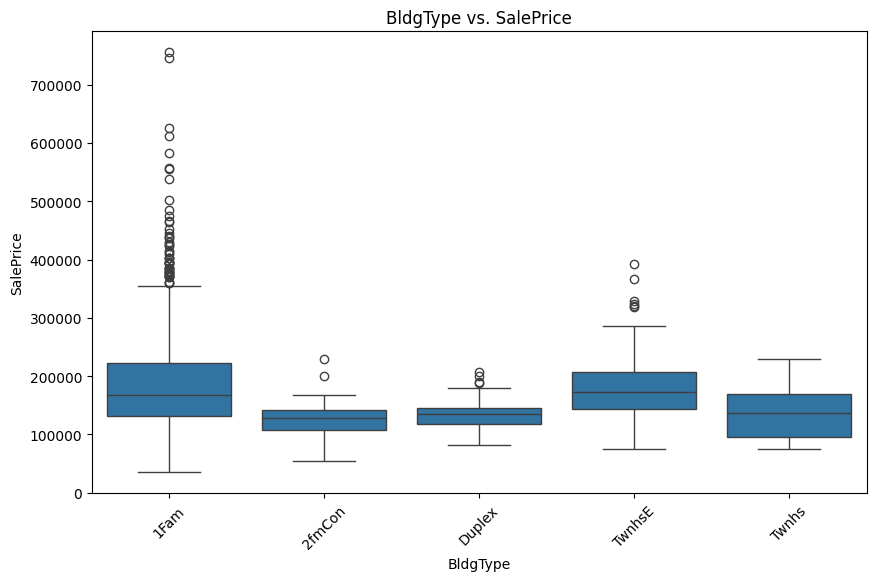

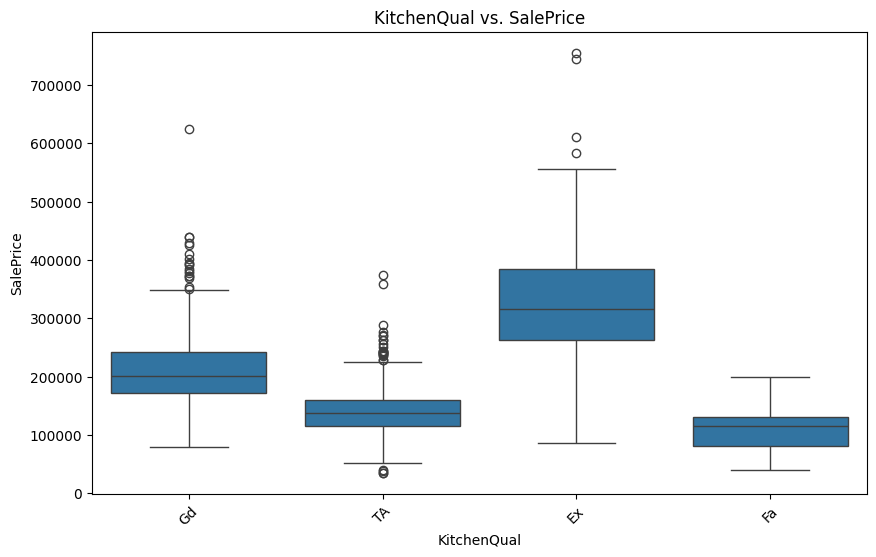

In [20]:
categorical_features = ['OverallQual', 'Neighborhood', 'BldgType', 'KitchenQual']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='SalePrice', data=train_df)
    plt.title(f'{feature} vs. SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()

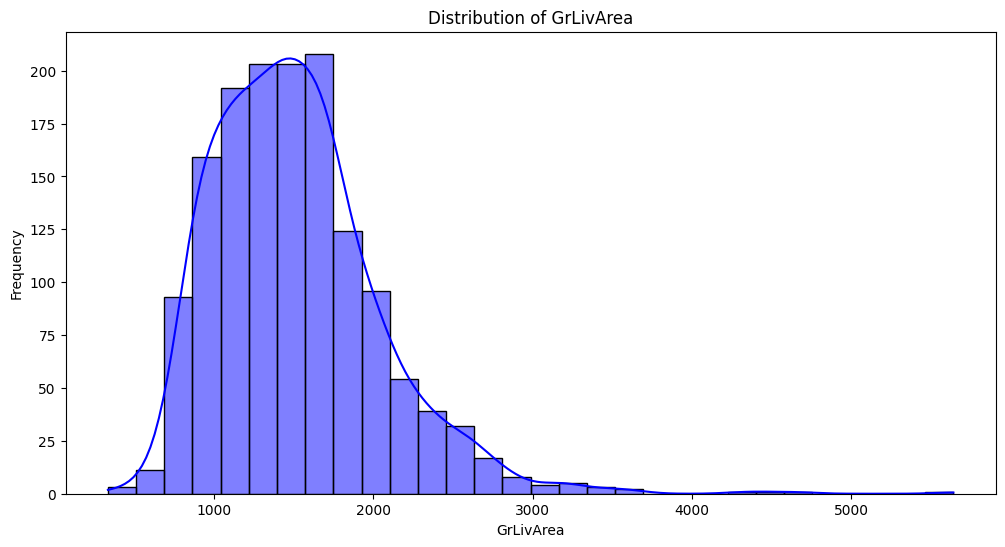

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['GrLivArea'], bins=30, kde=True, color='blue')
plt.title('Distribution of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0.98, 'Correlation between numerical features and Sales Price')

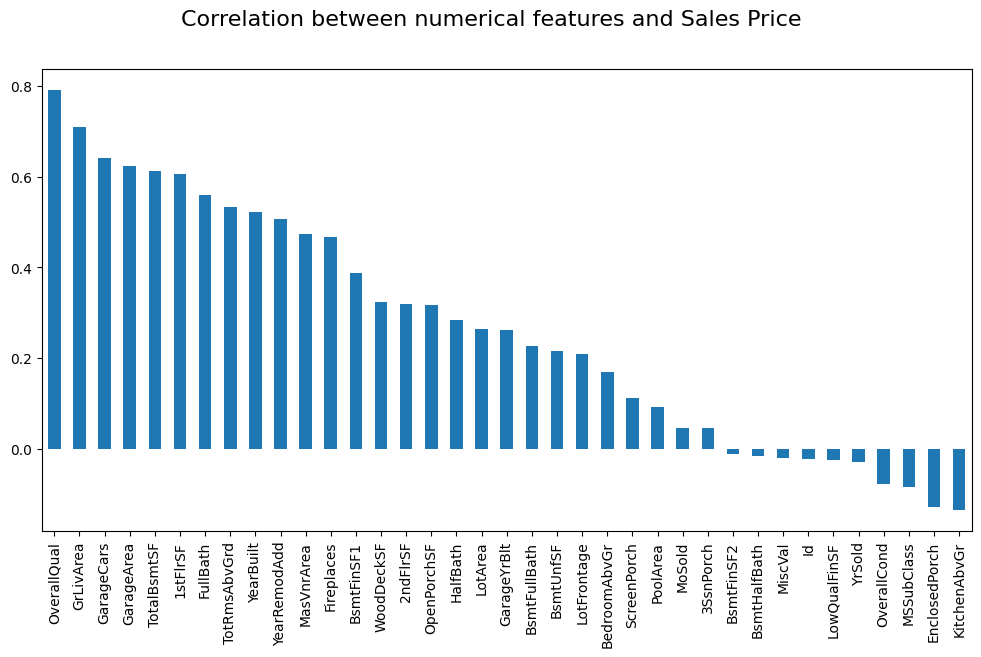

In [22]:
plt.figure(figsize=(12, 6))
train_df.select_dtypes(include=[np.number]).corr()['SalePrice'].sort_values(ascending = False).drop('SalePrice').plot(kind = 'bar')
plt.suptitle('Correlation between numerical features and Sales Price', fontsize=16)

# Train model

### Linear Regression

In [23]:
# encoding the object columns
Object_columns = train_df.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder()

object_cols = train_df.select_dtypes(include=['object']).columns

encoder = OrdinalEncoder()


for column in object_cols:
    train_df[column] = encoder.fit_transform(train_df[column].values.reshape(-1, 1))

# checking the dataset
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,...,0,3.0,4.0,1.0,0,2,2008,8.0,4.0,208500
1,2,20,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,...,0,3.0,4.0,1.0,0,5,2007,8.0,4.0,181500
2,3,60,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,...,0,3.0,4.0,1.0,0,9,2008,8.0,4.0,223500
3,4,70,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,...,0,3.0,4.0,1.0,0,2,2006,8.0,0.0,140000
4,5,60,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,...,0,3.0,4.0,1.0,0,12,2008,8.0,4.0,250000


In [24]:
correlation_matrix = train_df.corr()
correlation_with_saleprice = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
print(correlation_with_saleprice)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
ExterQual       0.636884
                  ...   
BsmtHalfBath    0.016844
LandContour     0.015453
Utilities       0.014314
BsmtFinSF2      0.011378
Condition2      0.007513
Name: SalePrice, Length: 81, dtype: float64


In [25]:
correlation_with_saleprice[correlation_with_saleprice > 0.5]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
ExterQual       0.636884
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.593734
KitchenQual     0.589189
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [26]:
test_missing_data = test_df.isnull().sum() / len(test_df) * 100
test_missing_data = test_missing_data[test_missing_data > 0].sort_values(ascending=False)
print(test_missing_data)

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
MasVnrType      61.274846
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageYrBlt      5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Functional       0.137080
Utilities        0.137080
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
KitchenQual      0.068540
BsmtUnfSF        0.068540
BsmtFinSF2       0.068540
BsmtFinSF1       0.068540
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
dtype: float64


In [27]:
# Let's impute the missing values in the test dataset, object type with 'None', int type with 0, and the electrical column with the mode value. 
test_data = test_df.isna().sum().reset_index().rename(columns={0: 'Missing_Values', 'index': 'Column'})
test_column_missing = list(test_data[test_data['Missing_Values'] > 0]['Column'])

# imputing the missing values
for col in test_column_missing:
    if col == 'Electrical':
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])
    elif test_df[col].dtype == 'object':
        test_df[col] = test_df[col].fillna('None')
    else:
        test_df[col] = test_df[col].fillna(0)

In [28]:
test_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [29]:
test_object_cols = test_df.select_dtypes(include=['object']).columns

encoder = OrdinalEncoder()


for column in test_object_cols:
    test_df[column] = encoder.fit_transform(test_df[column].values.reshape(-1, 1))

# checking the dataset
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3.0,80.0,11622,1.0,1.0,3.0,3.0,0.0,...,120,0,2.0,2.0,1.0,0,6,2010,9.0,4.0
1,1462,20,4.0,81.0,14267,1.0,1.0,0.0,3.0,0.0,...,0,0,2.0,4.0,0.0,12500,6,2010,9.0,4.0
2,1463,60,4.0,74.0,13830,1.0,1.0,0.0,3.0,0.0,...,0,0,2.0,2.0,1.0,0,3,2010,9.0,4.0
3,1464,60,4.0,78.0,9978,1.0,1.0,0.0,3.0,0.0,...,0,0,2.0,4.0,1.0,0,6,2010,9.0,4.0
4,1465,120,4.0,43.0,5005,1.0,1.0,0.0,1.0,0.0,...,144,0,2.0,4.0,1.0,0,1,2010,9.0,4.0


In [30]:
X = train_df.drop(['SalePrice'], axis = 1)
y = train_df['SalePrice']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(f"X_train shape: ", X_train.shape)
print(f"X_test shape: ", X_test.shape)
print(f"y_train shape: ", y_train.shape)
print(f"y_test shape: ", y_test.shape)

X_train shape:  (1168, 80)
X_test shape:  (292, 80)
y_train shape:  (1168,)
y_test shape:  (292,)


In [33]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
# lnr = LinearRegression()

In [ ]:
# lnr.fit(X_train, y_train)

In [ ]:
# y_pred = lnr.predict(X_test)

In [ ]:
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')
# r2 = r2_score(y_test, y_pred)
# print(f'R-squared: {r2}')

In [ ]:
# # Scatter plot
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=y_test, y=y_pred)
# plt.title('True vs Predicted SalePrice')
# plt.xlabel('True SalePrice')
# plt.ylabel('Predicted SalePrice')
# plt.show()

# # Alternatively, a line plot of the first 100 samples for better visibility
# plt.figure(figsize=(12, 6))
# plt.plot(np.arange(100), y_test[:100], label='True SalePrice', marker='x')
# plt.plot(np.arange(100), y_pred[:100], label='Predicted SalePrice', marker='o')
# plt.title('True vs Predicted SalePrice (First 100 Samples)')
# plt.xlabel('Sample Index')
# plt.ylabel('SalePrice')
# plt.legend()
# plt.show()

### Random Forest regression

In [34]:
rfr = RandomForestRegressor()

In [ ]:
# param_gb = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
#             'max_depth': list(range(10, 21)),
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 5, 10]}
# grid_gb = GridSearchCV(estimator = rfr, 
#                         param_grid = param_gb, 
#                         cv=5,
#                         verbose= 2,
#                         n_jobs = -1)

In [ ]:
# grid_gb.fit(X_train, y_train)
# grid_gb.best_params_

In [35]:
rfr_params = {'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 70}

rfr = RandomForestRegressor(**rfr_params, random_state=42)

model = [
    ('ridge', Ridge(alpha = 15)),
    ('rfr', rfr)
]

stack = StackingRegressor(estimators=model, final_estimator=LinearRegression())
stack.fit(X_train, y_train)

StackingRegressor(estimators=[('ridge', Ridge(alpha=15)),
                              ('rfr',
                               RandomForestRegressor(max_depth=15,
                                                     min_samples_split=5,
                                                     n_estimators=70,
                                                     random_state=42))],
                  final_estimator=LinearRegression())

In [36]:
y_pred = stack.predict(X_test)

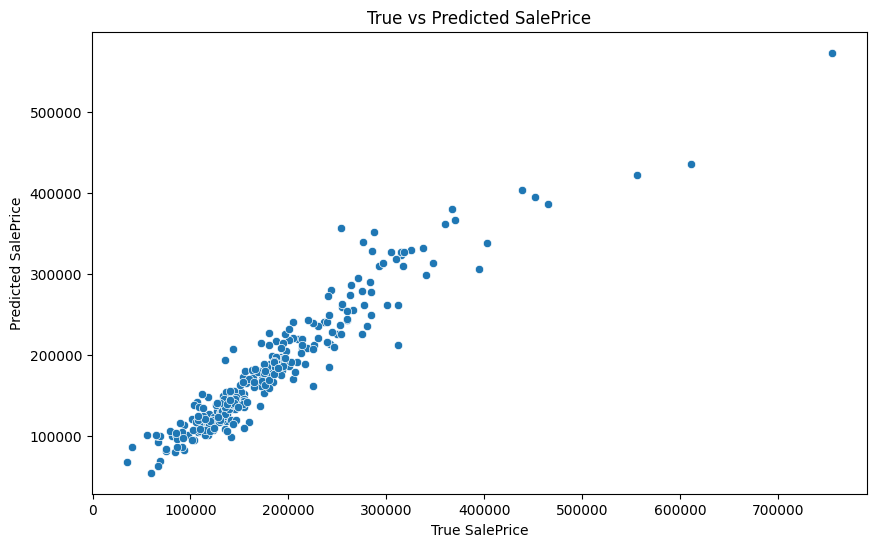

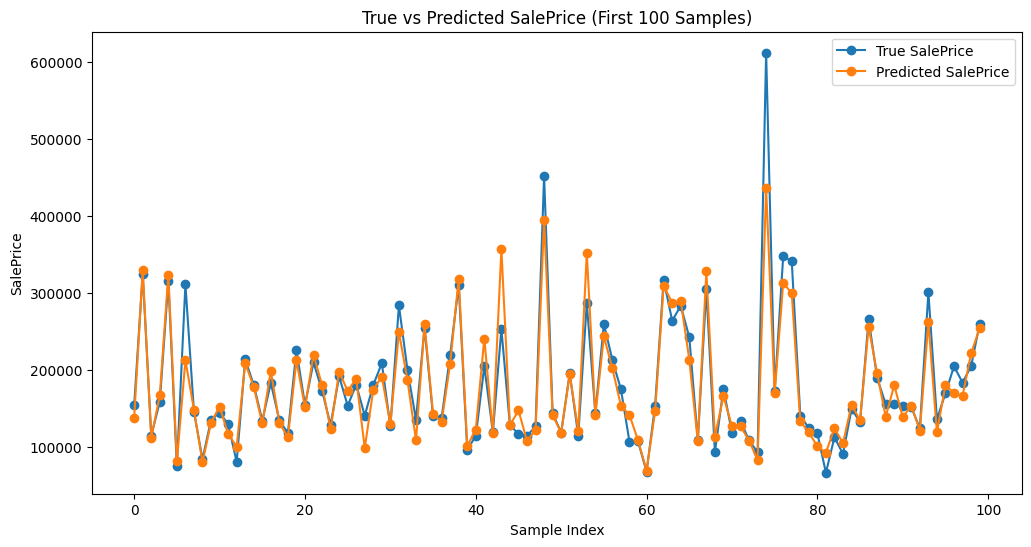

In [37]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('True vs Predicted SalePrice')
plt.xlabel('True SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

# Alternatively, a line plot of the first 100 samples for better visibility
plt.figure(figsize=(12, 6))
plt.plot(np.arange(100), y_test[:100], label='True SalePrice', marker='o')
plt.plot(np.arange(100), y_pred[:100], label='Predicted SalePrice', marker='o')
plt.title('True vs Predicted SalePrice (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('SalePrice')
plt.legend()
plt.show()